In [447]:
# Import packages that will be utilized during this process
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [448]:
# Remove pandas duplication of the first column within the file
df = pd.read_csv('./churn_raw_data.csv', index_col=0)

In [449]:
# View data types and column information, dataframe as a whole
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              7505 non-null   float64
 14  Age                   7525 non-null   float64
 15  Education          

In [450]:
# Get summary statistics of the dataset with datatype int64
print(df.describe())

       CaseOrder      Zip      Lat      Lng  Population  Children     Age  \
count   10000.00 10000.00 10000.00 10000.00    10000.00   7505.00 7525.00   
mean     5000.50 49153.32    38.76   -90.78     9756.56      2.10   53.28   
std      2886.90 27532.20     5.44    15.16    14432.70      2.15   20.75   
min         1.00   601.00    17.97  -171.69        0.00      0.00   18.00   
25%      2500.75 26292.50    35.34   -97.08      738.00      0.00   35.00   
50%      5000.50 48869.50    39.40   -87.92     2910.50      1.00   53.00   
75%      7500.25 71866.50    42.11   -80.09    13168.00      3.00   71.00   
max     10000.00 99929.00    70.64   -65.67   111850.00     10.00   89.00   

         Income  Outage_sec_perweek    Email  ...  MonthlyCharge  \
count   7510.00            10000.00 10000.00  ...       10000.00   
mean   39936.76               11.45    12.02  ...         174.08   
std    28358.47                7.03     3.03  ...          43.34   
min      740.66               -1.3

In [451]:
# View data counts to ensure appropriate for values City
df.City.value_counts()

Houston         34
New York        24
Springfield     23
Buffalo         23
San Antonio     22
                ..
Cottontown       1
San Dimas        1
Fort Hill        1
Webster          1
Clarkesville     1
Name: City, Length: 6058, dtype: int64

In [452]:
# View data counts to ensure appropriate values for State
df.State.value_counts()

TX    603
NY    558
PA    550
CA    526
IL    413
OH    359
FL    324
MO    310
VA    285
NC    280
IA    279
MI    279
MN    264
WV    247
IN    241
GA    238
KY    238
WI    228
OK    203
KS    195
NJ    190
TN    185
AL    181
NE    181
AR    176
WA    175
MA    172
CO    155
LA    141
MS    126
SC    124
MD    123
ND    118
NM    114
OR    114
AZ    112
ME    112
SD    101
MT     96
NH     85
VT     84
ID     81
AK     77
CT     71
UT     66
NV     48
WY     43
PR     40
HI     35
DE     21
RI     19
DC     14
Name: State, dtype: int64

In [453]:
# View data counts to ensure appropriate values for County
df.County.value_counts()

Washington     111
Jefferson      100
Montgomery      99
Franklin        92
Los Angeles     91
              ... 
Rooks            1
Cochise          1
Yauco            1
Hoke             1
Briscoe          1
Name: County, Length: 1620, dtype: int64

In [454]:
# View data counts to ensure appropriate values for Timezone
df.Timezone.value_counts()

America/New_York                  4072
America/Chicago                   3672
America/Los_Angeles                887
America/Denver                     552
America/Detroit                    265
America/Indiana/Indianapolis       186
America/Phoenix                    104
America/Boise                       57
America/Anchorage                   55
America/Puerto_Rico                 40
Pacific/Honolulu                    35
America/Menominee                   16
America/Nome                        12
America/Kentucky/Louisville         10
America/Sitka                        8
America/Indiana/Vincennes            6
America/Indiana/Tell_City            6
America/Toronto                      5
America/Indiana/Petersburg           4
America/Juneau                       2
America/North_Dakota/New_Salem       2
America/Indiana/Knox                 1
America/Indiana/Winamac              1
America/Indiana/Marengo              1
America/Ojinaga                      1
Name: Timezone, dtype: in

In [455]:
# View data counts to ensure appropriate values for Job
df.Job.value_counts()

Occupational psychologist               30
Comptroller                             28
Hospital pharmacist                     28
Horticultural therapist                 28
Ranger/warden                           27
                                        ..
Control and instrumentation engineer     6
Travel agency manager                    6
Accountant, chartered certified          6
Arboriculturist                          6
Toxicologist                             6
Name: Job, Length: 639, dtype: int64

In [456]:
# View data counts to ensure appropriate values for Education
df.Education.value_counts()

Regular High School Diploma                 2421
Bachelor's Degree                           1703
Some College, 1 or More Years, No Degree    1562
9th Grade to 12th Grade, No Diploma          870
Master's Degree                              764
Associate's Degree                           760
Some College, Less than 1 Year               652
Nursery School to 8th Grade                  449
GED or Alternative Credential                387
Professional School Degree                   198
No Schooling Completed                       118
Doctorate Degree                             116
Name: Education, dtype: int64

In [457]:
# View data counts to ensure appropriate values for Marital
df.Marital.value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [458]:
# View data counts to ensure appropriate values for Gender
df.Gender.value_counts()

Female                  5025
Male                    4744
Prefer not to answer     231
Name: Gender, dtype: int64

In [459]:
# View data counts to ensure appropriate values for Churn
df.Churn.value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [460]:
# View data counts to ensure appropriate values for Contacts
df.Contacts.value_counts()

0    3680
1    3675
2    1872
3     608
4     137
5      20
6       5
7       3
Name: Contacts, dtype: int64

In [461]:
# View data counts to ensure appropriate values for Yearly_equip_failure
df.Yearly_equip_failure.describe()

count   10000.00
mean        0.40
std         0.64
min         0.00
25%         0.00
50%         0.00
75%         1.00
max         6.00
Name: Yearly_equip_failure, dtype: float64

In [462]:
# View data counts to ensure appropriate values for Techie
df.Techie.value_counts()

No     6266
Yes    1257
Name: Techie, dtype: int64

In [463]:
# View data counts to ensure appropriate values for Contract
df.Contract.value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [464]:
# View data counts to ensure appropriate values for Port_modem
df.Port_modem.value_counts()

No     5166
Yes    4834
Name: Port_modem, dtype: int64

In [465]:
# View data counts to ensure appropriate values for InternetService
df.InternetService.value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [466]:
# View data counts to ensure appropriate values for Phone
df.Phone.value_counts()

Yes    8128
No      846
Name: Phone, dtype: int64

In [467]:
# View data counts to ensure appropriate values for Multiple
df.Multiple.value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

In [468]:
# View data counts to ensure appropriate values for OnlineSecurity
df.OnlineSecurity.value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

In [469]:
# View data counts to ensure appropriate values for OnlineBackup
df.OnlineBackup.value_counts()

No     5494
Yes    4506
Name: OnlineBackup, dtype: int64

In [470]:
# View data counts to ensure appropriate values for DeviceProtection
df.DeviceProtection.value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

In [471]:
# View data counts to ensure appropriate values for TechSupport
df.TechSupport.value_counts()

No     5635
Yes    3374
Name: TechSupport, dtype: int64

In [472]:
# View data counts to ensure appropriate values for StreamingTV
df.StreamingTV.value_counts()

No     5071
Yes    4929
Name: StreamingTV, dtype: int64

In [473]:
# View data counts to ensure appropriate values for PaperlessBilling
df.PaperlessBilling.value_counts()

Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64

In [474]:
# View data counts to ensure appropriate values for PaymentMethod
df.PaymentMethod.value_counts()

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

In [475]:
# View data counts to ensure appropriate values for Tenure
df.Tenure.value_counts()

69.50    2
55.45    2
62.87    2
66.67    2
66.51    1
        ..
17.41    1
4.46     1
7.60     1
8.44     1
63.35    1
Name: Tenure, Length: 9065, dtype: int64

In [476]:
# Get a deeper view of the tenure counts by viewing the minimum value
minimum_value = df['Tenure'].min()
print(minimum_value)


1.00025934


In [477]:
# Get a deeper view of the tenure counts by viewing the maximum value
maximum_value = df['Tenure'].max()
print(maximum_value)

71.99928


In [478]:
# Check for missing values
print(df.isnull().sum())

CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup               0
DeviceProtecti

In [479]:
# Check for duplicates
duplicates = df.duplicated(keep=False)
duplicate_rows = df[duplicates]
print(df.duplicated().value_counts())

False    10000
dtype: int64


In [480]:
# Change column names to be all lowercase
df.columns = [col.lower() for col in df.columns]

In [481]:
# Rename the caseorder column for proper spacing
df = df.rename(columns={'caseorder': 'case_order'})

In [482]:
# Rename the outage_sec_perweek column for proper spacing
df = df.rename(columns={'outage_sec_perweek': 'outage_sec_per_week'})

In [483]:
# Rename the onlinesecurity column for proper spacing
df = df.rename(columns={'onlinesecurity': 'online_security'})

In [484]:
# Rename the internetservice column for proper spacing
df = df.rename(columns={'internetservice': 'internet_service'})

In [485]:
# Rename the onlinebackup column for proper spacing
df = df.rename(columns={'onlinebackup': 'online_backup'})

In [486]:
# Rename the deviceprotection column for proper spacing
df = df.rename(columns={'deviceprotection': 'device_protection'})

In [487]:
# Rename the techsupport column for proper spacing
df = df.rename(columns={'techsupport': 'tech_support'})

In [488]:
# Rename the streamingtv column for proper spacing
df = df.rename(columns={'streamingtv': 'streaming_tv'})

In [489]:
# Rename the streamingmovies column for proper spacing
df = df.rename(columns={'streamingmovies': 'streaming_movies'})

In [490]:
# Rename the paperlessbilling column for proper spacing
df = df.rename(columns={'paperlessbilling': 'paperless_billing'})

In [491]:
# Rename the paymentmethod column for proper spacing
df = df.rename(columns={'paymentmethod': 'payment_method'})

In [492]:
# Rename the monthlycharge column for proper spacing
df = df.rename(columns={'monthlycharge': 'monthly_charge'})

In [493]:
# Enforce Ordinal Encoding for education
df.education.unique()
Dict_edu = {'education': {"Regular High School Diploma": 12, "Bachelor's Degree": 4,
"Some College, 1 or More Years, No Degree": 1,"9th Grade to 12th Grade, No Diploma": 11,
                          "Master's Degree": 6, "Associate's Degree": 2, 
                          "Some College, Less than 1 Year": 13, 
                          "Nursery School to 8th Grade": 8, "GED or Alternative Credential": 12,
                          "Professional School Degree": 10,"No Schooling Completed": 0, 
                          "Doctorate Degree": 16, "unknown": np.NaN}}

In [494]:
# Enforce Ordinal Encoding for churn
df.churn.unique()
Dict_churn = {'churn': {"Yes": 1, "No": 2, "unknown": np.NaN}}

In [495]:
# Enforce Ordinal Encoding for techie
df.techie.unique()
Dict_techie = {'techie': {"Yes": 1, "No": 2, "unknown": np.NaN}}

In [496]:
# Enforce Ordinal Encoding for contract
df.contract.unique()
Dict_contract = {'contract': {"Month-to-month": 0, "One year": 1, 
                              "Two Year": 2, "unknown": np.NaN}}

In [497]:
# Enforce Ordinal Encoding for port_modem
df.port_modem.unique()
Dict_port_modem = {'port_modem': {"Yes": 1, "No": 2, "unknown": np.NaN}}

In [498]:
# Enforce Ordinal Encoding for tablet
df.tablet.unique()
Dict_tablet = {'tablet': {"Yes": 1, "No": 2, "unknown": np.NaN}}

In [499]:
# Enforce Ordinal Encoding for phone
df.phone.unique()
Dict_phone = {'phone': {"Yes": 1, "No": 2, "unknown": np.NaN}}

In [500]:
# Enforce Ordinal Encoding for multiple
df.multiple.unique()
Dict_multiple = {'multiple': {"Yes": 1, "No": 2, "unknown": np.NaN}}

In [501]:
# Enforce Ordinal Encoding for onlinesecurity
df.online_security.unique()
Dict_online_security = {'online_security': {"Yes": 1, "No": 2, "unknown": np.NaN}}

In [502]:
# Enforce Ordinal Encoding for internetservice
df.internet_service.unique()
Dict_internet_service = {'internet_service': {"Fiber Optic": 0, 
                                              "DSL": 1, "None": 2, "unknown": np.NaN}}

In [503]:
# Enforce Ordinal Encoding for onlinebackup
df.online_backup.unique()
Dict_online_backup = {'online_backup': {"Yes": 1, "No": 2, "unknown": np.NaN}}

In [504]:
# Enforce Ordinal Encoding for deviceprotection
df.device_protection.unique()
Dict_device_protection = {'device_protection': {"Yes": 1, "No": 2, "unknown": np.NaN}}

In [505]:
# Enforce Ordinal Encoding for techsupport
df.tech_support.unique()
Dict_tech_support = {'tech_support': {"Yes": 1, "No": 2, "unknown": np.NaN}}

In [506]:
# Enforce Ordinal Encoding for streamingtv, correct name for proper spacing
df.streaming_tv.unique()
Dict_streaming_tv = {'streaming_tv': {"Yes": 1, "No": 2, "unknown": np.NaN}}

In [507]:
# Enforce Ordinal Encoding for streamingmovies, correct name for proper spacing
df.streaming_movies.unique()
Dict_streaming_movies = {'streaming_movies': {"Yes": 1, "No": 2, "unknown": np.NaN}}

In [508]:
# Enforce Ordinal Encoding for paperlessbilling
df.paperless_billing.unique()
Dict_paperless_billing = {'paperless_billing': {"Yes": 1, "No": 2, "unknown": np.NaN}}

In [509]:
#Drop negative value in outage_sec_perweek column
df = df[df['outage_sec_per_week'] >= 0]

In [510]:
#Drop 0 value in population column
df = df[df['population'] >= 1]

In [511]:
# Drop missing values from techie, phone and tech_support
df.dropna(subset=['techie', 'phone', 'tech_support'], inplace=True)

In [512]:
# To mitigate the 0 tenure and bandwidth values, display all float values
pd.set_option('display.float_format', '{:.2f}'.format)

In [513]:
# Replace the null values with -1, for less than one gb per year
df['bandwidth_gb_year'] = df['bandwidth_gb_year'].fillna(-1)

In [514]:
# Replace the null values with -1, for less than one year
df['tenure'] = df['tenure'].fillna(-1)

In [515]:
# Calculate the mean value of each remaining column needing null correction
age_mean = np.round(df['age'].mean())
income_mean = np.round(df['income'].mean())
children_mean = np.round(df['children'].mean())

In [516]:
# Fill in missing values for age, income, and children with mean values to the nearest whole number
df['age'] = df['age'].fillna(age_mean)
df['income'] = df['income'].fillna(income_mean)
df['children'] = df['children'].fillna(children_mean)

In [517]:
# Replace location based timezone values with time-zone specific values
df.timezone.replace({
    # Change all Pacific cities to PDT - Pacific Daylight Time
    "America/Los_Angeles": "PDT - Pacific Daylight Time",
    # Change all Alaskan cities to AT - Alaskan Time
    "America/Anchorage": "AT - Alaskan Time",
    "America/Nome": "AT - Alaskan Time",
    "America/Sitka": "AT - Alaskan Time",
    "America/Juneau": "AT - Alaskan Time",
    # Change all Mountain Standard cities to MST - Mountain Standard Time
    "America/Denver": "MST - Mountain Standard Time",
    "America/Phoenix": "MST - Mountain Standard Time",
    "America/Boise": "MST - Mountain Standard Time",
    # Change all Central cities to CDT - Central Daylight Time
    "America/Chicago": "CDT - Central Daylight Time",
    "America/Menominee": "CDT - Central Daylight Time",
    "America/Indiana/Tell_City": "CDT - Central Daylight Time",
    "America/North_Dakota/New_Salem": "CDT - Central Daylight Time",
    "America/Indiana/Knox": "CDT - Central Daylight Time",
    "America/Ojinaga": "CDT - Central Daylight Time",
    # Change all Eastern cities to EDT - Eastern Daylight Time
    "America/New_York": "EDT - Eastern Daylight Time",
    "America/Detroit": "EDT - Eastern Daylight Time",
    "America/Indiana/Indianapolis": "EDT - Eastern Daylight Time",
    "America/Kentucky/Louisville": "EDT - Eastern Daylight Time",
    "America/Indiana/Vincennes": "EDT - Eastern Daylight Time",
    "America/Toronto": "EDT - Eastern Daylight Time",
    "America/Indiana/Winamac": "EDT - Eastern Daylight Time",
    "America/Indiana/Marengo": "EDT - Eastern Daylight Time",
    "America/Indiana/Petersburg": "EDT - Eastern Daylight Time",
    # Change Puerto Rico to AST - Atlantic Standard Time
    "America/Puerto_Rico": "AST - Atlantic Standard Time",
    # Change Hawaii to HST - Hawaii Aleutian Time
    "Pacific/Honolulu": "HST - Hawaii Aleutian Time"
}, inplace=True)

In [518]:
# Fix minimum zip codes by converting column to string from int64, then front-fill with zeros to fill
df['zip'] = df['zip'].astype("str").str.zfill(5)

In [519]:
# Convert payment_method column to category from object
df["payment_method"] = df["payment_method"].astype("category")

In [520]:
# Convert area column to category from object
df["area"] = df["area"].astype("category")

In [521]:
# Convert timezone column to category from object
df["timezone"] = df["timezone"].astype("category")

In [522]:
# Convert marital column to category from object
df["marital"] = df["marital"].astype("category")

In [523]:
# Convert item1 column to category from int64
df["item1"] = df["item1"].astype("category")

In [524]:
# Convert item2 column to category from int64
df["item2"] = df["item2"].astype("category")

In [525]:
# Convert item3 column to category from int64
df["item3"] = df["item3"].astype("category")

In [526]:
# Convert item4 column to category from int64
df["item4"] = df["item4"].astype("category")

In [527]:
# Convert item5 column to category from int64
df["item5"] = df["item5"].astype("category")

In [528]:
# Convert item6 column to category from int64
df["item6"] = df["item6"].astype("category")

In [529]:
# Convert item7 column to category from int64
df["item7"] = df["item7"].astype("category")

In [530]:
# Convert item8 column to category from int64
df["item8"] = df["item8"].astype("category")

In [531]:
# Correct the gender column to have the value of nonbinary rather than prefer not to answer
df.gender = df.gender.str.lower()
df.gender.replace({"prefer not to answer": "nonbinary"}, inplace=True)

In [532]:
print(df.columns)

Index(['case_order', 'customer_id', 'interaction', 'city', 'state', 'county',
       'zip', 'lat', 'lng', 'population', 'area', 'timezone', 'job',
       'children', 'age', 'education', 'employment', 'income', 'marital',
       'gender', 'churn', 'outage_sec_per_week', 'email', 'contacts',
       'yearly_equip_failure', 'techie', 'contract', 'port_modem', 'tablet',
       'internet_service', 'phone', 'multiple', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'payment_method', 'tenure',
       'monthly_charge', 'bandwidth_gb_year', 'item1', 'item2', 'item3',
       'item4', 'item5', 'item6', 'item7', 'item8'],
      dtype='object')


In [533]:
# Check for missing values
print(df.isnull().sum())

case_order              0
customer_id             0
interaction             0
city                    0
state                   0
county                  0
zip                     0
lat                     0
lng                     0
population              0
area                    0
timezone                0
job                     0
children                0
age                     0
education               0
employment              0
income                  0
marital                 0
gender                  0
churn                   0
outage_sec_per_week     0
email                   0
contacts                0
yearly_equip_failure    0
techie                  0
contract                0
port_modem              0
tablet                  0
internet_service        0
phone                   0
multiple                0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
paperless_bi

In [534]:
# Get summary statistics of the dataset with datatype int64
print(df.zip.min())

00601


In [535]:
# Verify the changes in the tenure column
minimum_value = df['tenure'].min()
print(minimum_value)

-1.0


In [536]:
# Verify the changes in the bandwidth column
minimum_value = df['bandwidth_gb_year'].min()
print(minimum_value)

-1.0


In [537]:
# View data counts to ensure appropriate values for Gender
df.gender.value_counts()

female       3042
male         2846
nonbinary     130
Name: gender, dtype: int64

In [538]:
# View data counts to ensure appropriate values for Timezone
df.timezone.value_counts()

EDT - Eastern Daylight Time     2785
CDT - Central Daylight Time     2166
PDT - Pacific Daylight Time      542
MST - Mountain Standard Time     430
AT - Alaskan Time                 46
AST - Atlantic Standard Time      26
HST - Hawaii Aleutian Time        23
Name: timezone, dtype: int64

In [539]:
# Get summary statistics of the dataset with datatype int64
print(df.describe())

       case_order     lat     lng  population  children     age    income  \
count     6018.00 6018.00 6018.00     6018.00   6018.00 6018.00   6018.00   
mean      4958.44   38.76  -90.78     9790.83      2.08   53.22  39911.97   
std       2886.46    5.47   15.31    14544.86      1.86   18.02  24156.39   
min          1.00   17.97 -170.49        4.00      0.00   18.00    901.21   
25%       2457.75   35.39  -97.13      791.50      1.00   41.00  23954.13   
50%       4962.50   39.39  -87.72     2994.50      2.00   53.00  39912.00   
75%       7430.50   42.11  -80.08    12892.75      3.00   65.00  45248.45   
max       9999.00   70.64  -65.68   102433.00     10.00   89.00 212255.30   

       outage_sec_per_week   email  contacts  yearly_equip_failure  tenure  \
count              6018.00 6018.00   6018.00               6018.00 6018.00   
mean                 11.46   11.97      0.99                  0.40   31.02   
std                   7.01    3.04      0.97                  0.64   27.

In [540]:
# View data types and column information, dataframe as a whole
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 1 to 9999
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   case_order            6018 non-null   int64   
 1   customer_id           6018 non-null   object  
 2   interaction           6018 non-null   object  
 3   city                  6018 non-null   object  
 4   state                 6018 non-null   object  
 5   county                6018 non-null   object  
 6   zip                   6018 non-null   object  
 7   lat                   6018 non-null   float64 
 8   lng                   6018 non-null   float64 
 9   population            6018 non-null   int64   
 10  area                  6018 non-null   category
 11  timezone              6018 non-null   category
 12  job                   6018 non-null   object  
 13  children              6018 non-null   float64 
 14  age                   6018 non-null   float64 
 15  educ

In [541]:
# Save dataframe to CSV, ignore the index to avoid additional unnecessary column
df.to_csv('clean_data.csv', index=False)
df.head(15)

,case_order,customer_id,interaction,city,state,county,zip,lat,lng,population,...,monthly_charge,bandwidth_gb_year,item1,item2,item3,item4,item5,item6,item7,item8
1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25,-133.38,38,...,171.45,904.54,5,5,5,3,4,4,3,4
2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.33,-84.24,10446,...,242.95,800.98,3,4,3,3,4,3,4,4
3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.36,-123.25,3735,...,159.44,2054.71,4,4,2,4,4,3,3,3
4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.97,-117.25,13863,...,120.25,2164.58,4,4,4,2,5,4,3,3
5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38,-95.81,11352,...,150.76,271.49,4,4,4,3,4,4,4,5
6,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,Fort Valley,GA,Peach,31030,32.57,-83.89,17701,...,184.40,1039.36,3,3,3,2,4,3,3,3
7,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,Pioneer,TN,Scott,37847,36.43,-84.28,2535,...,200.06,1907.24,6,5,6,4,1,5,5,5
8,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,Oklahoma City,OK,Oklahoma,73109,35.43,-97.52,23144,...,114.75,979.61,2,2,2,5,2,3,4,5
11,11,J980369,89490f4b-765f-431a-b302-580aae7db71a,Little Meadows,PA,Susquehanna,18830,41.95,-76.11,555,...,177.45,2728.77,4,4,4,7,3,3,3,4
12,12,E243720,c32b8522-d62a-49b1-a77a-e0534cb1378b,Corozal,PR,Corozal,00783,18.30,-66.33,33372,...,148.36,1180.59,4,4,3,4,4,4,3,4


In [542]:
# Define features/variables for PCA and store them in a new data frame for the Principal Component Analysis to isolate them from other columns in the dataset
df_pca = df[["lat", "lng", "population", "children", "age", "income", "outage_sec_per_week", "email" , "yearly_equip_failure", "tenure", "monthly_charge", "bandwidth_gb_year"]]

In [543]:
# Subtract the mean from the value for each column and then divide by the standard deviation to normalize the data within this new data frame
df_pca_normalized = (df_pca-df_pca.mean())/df_pca.std()

In [544]:
# Confirm the shape of the dataframe to determine how many components are going to be applied to the dataset
pca = PCA(n_components=df_pca.shape[1])

In [545]:
# Fit normalized data onto our Principal Component Analysis to confirm that there are 12 components
pca.fit(df_pca_normalized)

PCA(n_components=12)

In [546]:
# Transform the data back into a dataframe after completing the PCA
df_pca2 = pd.DataFrame(pca.transform(df_pca_normalized), columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11" , "PC12"])

In [547]:
# Display the dateframe of each component of the PCA and its corresponding loading
pca_loadings = pd.DataFrame(pca.components_.T, 
columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11" , "PC12"],
 index=df_pca_normalized.columns)

In [548]:
# Print out the component loadings to find the correlation coefficients of each Principal Component
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
lat,0.00,-0.70,-0.03,0.12,-0.16,-0.04,-0.00,0.10,0.02,-0.02,0.67,0.00
lng,-0.01,0.14,-0.01,-0.82,0.12,-0.01,-0.13,-0.30,0.23,0.05,0.37,0.01
population,0.01,0.66,0.05,0.33,0.09,0.04,0.08,0.13,-0.10,-0.03,0.64,0.00
children,-0.01,-0.07,-0.08,-0.33,0.19,0.16,0.75,0.34,-0.36,-0.04,-0.00,0.03
age,-0.01,0.02,0.02,-0.06,-0.41,0.76,-0.17,-0.16,-0.38,0.20,0.03,-0.02
income,0.03,-0.10,-0.06,0.28,0.37,0.45,0.34,-0.50,0.43,-0.11,0.01,-0.00
outage_sec_per_week,0.03,-0.07,0.69,0.04,0.17,-0.05,0.11,-0.00,0.05,0.69,0.00,0.01
email,-0.05,0.14,0.15,-0.07,-0.64,0.08,0.31,0.26,0.61,-0.05,-0.04,-0.02
yearly_equip_failure,0.01,-0.07,0.11,-0.08,0.41,0.42,-0.39,0.63,0.26,-0.14,-0.03,-0.00
tenure,0.70,0.01,-0.05,-0.01,-0.05,0.01,-0.01,0.02,0.03,0.04,-0.01,0.70


In [549]:
covariance_matrix = np.dot(df_pca_normalized.T, df_pca_normalized) / df_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(covariance_matrix, eigenvector)) for eigenvector in pca.components_]

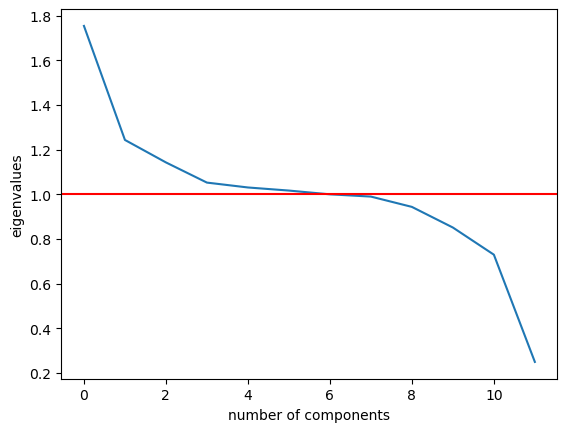

In [550]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color= "red")
plt.show()